# House Price Analysis and Prediction

## Objectives

The objective of this project is to analyze a dataset of house listings to uncover key factors influencing property prices across various cities and locations. Through thorough exploratory data analysis, feature engineering, and predictive modeling, the goal is to build a reliable model that can estimate house prices based on available features. Additionally, the project aims to detect outliers, understand patterns in the housing market, and provide actionable insights that can assist buyers, sellers, and real estate agencies in making informed decisions.


Importing the Libraries

In [1]:
# Importing Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine Learning Tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# reading the dataset 
df = pd.read_csv('zameen-updated.csv')

# first 5 rows
df.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla


In [3]:
# Statistics
df.describe()

,property_id,location_id,price,latitude,longitude,baths,bedrooms,Area Size
count,1.684460e+05,168446.000000,1.684460e+05,168446.000000,168446.000000,168446.000000,168446.000000,168446.000000
mean,1.559626e+07,4375.936395,1.776576e+07,29.859519,71.239804,2.874227,3.179422,5.892188
std,2.251207e+06,3776.561581,3.531003e+07,3.807870,3.133042,2.463400,1.971401,5.778327
min,8.657500e+04,1.000000,0.000000e+00,11.052446,25.906027,0.000000,0.000000,0.000000
25%,1.488320e+07,1058.000000,1.750000e+05,24.948536,67.130363,0.000000,2.000000,3.000000
50%,1.665851e+07,3286.000000,8.500000e+06,31.459784,73.056182,3.000000,3.000000,5.000000
75%,1.708662e+07,7220.000000,1.950000e+07,33.560887,73.259870,4.000000,4.000000,8.000000
max,1.735772e+07,14220.000000,2.000000e+09,73.184088,80.161430,403.000000,68.000000,800.000000


In [4]:
# Stats of the categorical columns
df.describe(include=['object'])

,page_url,property_type,location,city,province_name,area,purpose,date_added,agency,agent,Area Type,Area Category
count,168446,168446,168446,168446,168446,168446,168446,168446,124375,124374,168446,168446
unique,168446,7,1509,5,3,344,2,124,5761,10598,2,22
top,https://www.zameen.com/Property/bahria_town_ka...,House,DHA Defence,Karachi,Punjab,1 Kanal,For Sale,07-03-2019,Real Investment Consultants,Boez Ayub,Marla,0-5 Marla
freq,1,105468,22046,60484,70536,20061,120655,9485,794,787,137769,64501


In [5]:
# Datatyes
df.dtypes

property_id        int64
location_id        int64
page_url          object
property_type     object
price              int64
location          object
city              object
province_name     object
latitude         float64
longitude        float64
baths              int64
area              object
purpose           object
bedrooms           int64
date_added        object
agency            object
agent             object
Area Type         object
Area Size        float64
Area Category     object
dtype: object

In [6]:
# Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    168446 non-null  int64  
 1   location_id    168446 non-null  int64  
 2   page_url       168446 non-null  object 
 3   property_type  168446 non-null  object 
 4   price          168446 non-null  int64  
 5   location       168446 non-null  object 
 6   city           168446 non-null  object 
 7   province_name  168446 non-null  object 
 8   latitude       168446 non-null  float64
 9   longitude      168446 non-null  float64
 10  baths          168446 non-null  int64  
 11  area           168446 non-null  object 
 12  purpose        168446 non-null  object 
 13  bedrooms       168446 non-null  int64  
 14  date_added     168446 non-null  object 
 15  agency         124375 non-null  object 
 16  agent          124374 non-null  object 
 17  Area Type      168446 non-nul

In [7]:
# Dimensions or the shape of the dataset
df.shape

(168446, 20)

In [3]:
# Checking the duplicates
df.duplicated().sum()

np.int64(0)

In [4]:
# Checking the null values
df.isnull().sum()

property_id          0
location_id          0
page_url             0
property_type        0
price                0
location             0
city                 0
province_name        0
latitude             0
longitude            0
baths                0
area                 0
purpose              0
bedrooms             0
date_added           0
agency           44071
agent            44072
Area Type            0
Area Size            0
Area Category        0
dtype: int64

In [5]:
# filling the missing values with the placeholders
df['agency'].fillna('Nan', inplace=True)
df['agent'].fillna('Nan', inplace=True)

In [6]:
df.isnull().sum()

property_id      0
location_id      0
page_url         0
property_type    0
price            0
location         0
city             0
province_name    0
latitude         0
longitude        0
baths            0
area             0
purpose          0
bedrooms         0
date_added       0
agency           0
agent            0
Area Type        0
Area Size        0
Area Category    0
dtype: int64

# Exploratory Data Analysis (EDA)

For Numeric Columns

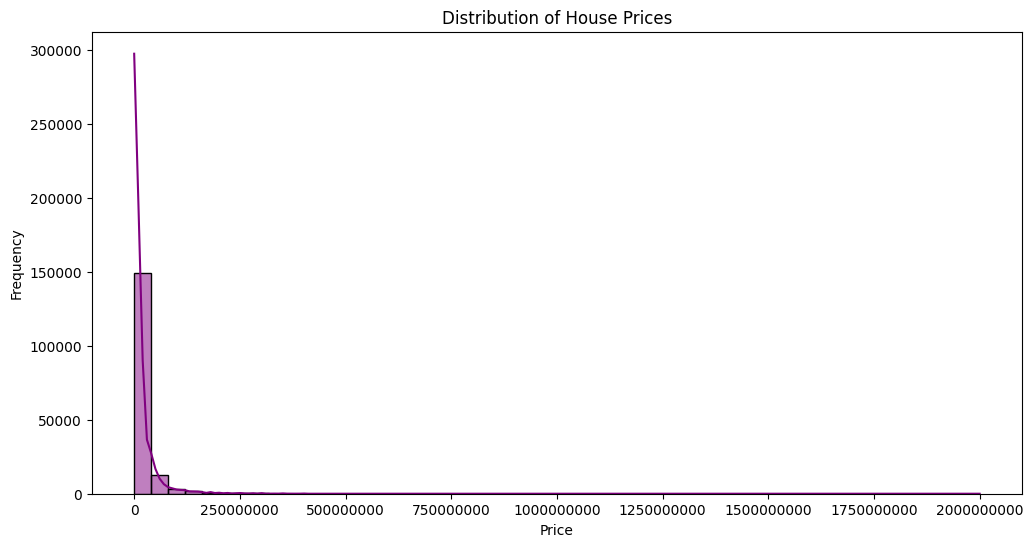

In [12]:
# Histogram to check the skewness
plt.figure(figsize=(12, 6))
sns.histplot(df['price'], bins=50, kde=True, color='purple')
plt.title('Distribution of House Prices')
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

The histogram shows that most house prices are clustered at the lower end, with a sharp drop as prices increase. This right-skewed distribution indicates the presence of a few very expensive houses (outliers).

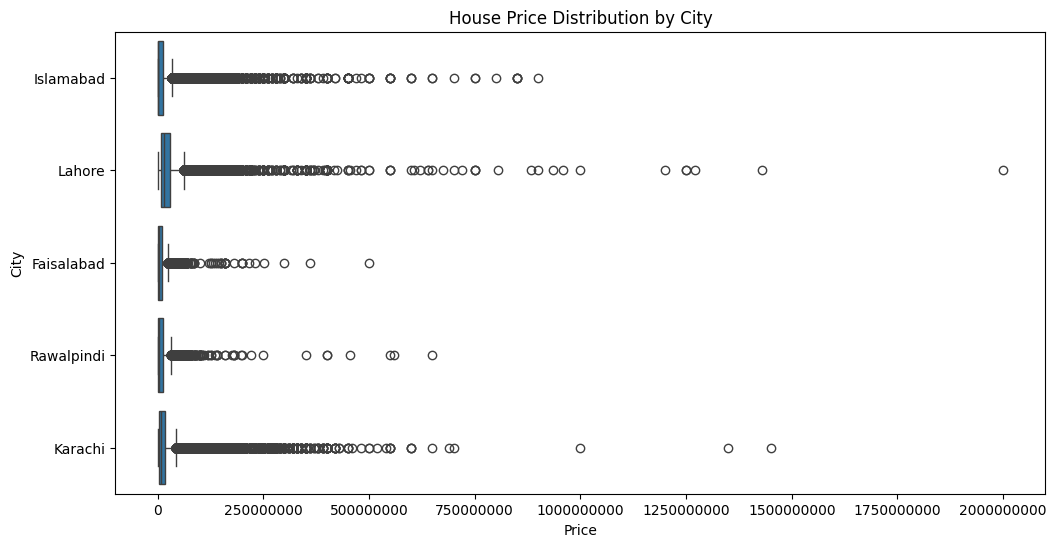

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='price', y='city', data=df)
plt.title("House Price Distribution by City")
plt.ticklabel_format(style='plain', axis='x') # to avoid price in the scientific forms 
plt.xlabel("Price")
plt.ylabel("City")
plt.show()

House Price Distribution by City


This boxplot shows the distribution of house prices across different cities. Most of the prices are concentrated near the lower end, while each city has a large number of outliers (very expensive houses) scattered across a wide range. Lahore and Karachi appear to have more high-end outliers compared to other cities. The data is highly skewed, suggesting the need for outlier handling to improve model performance.

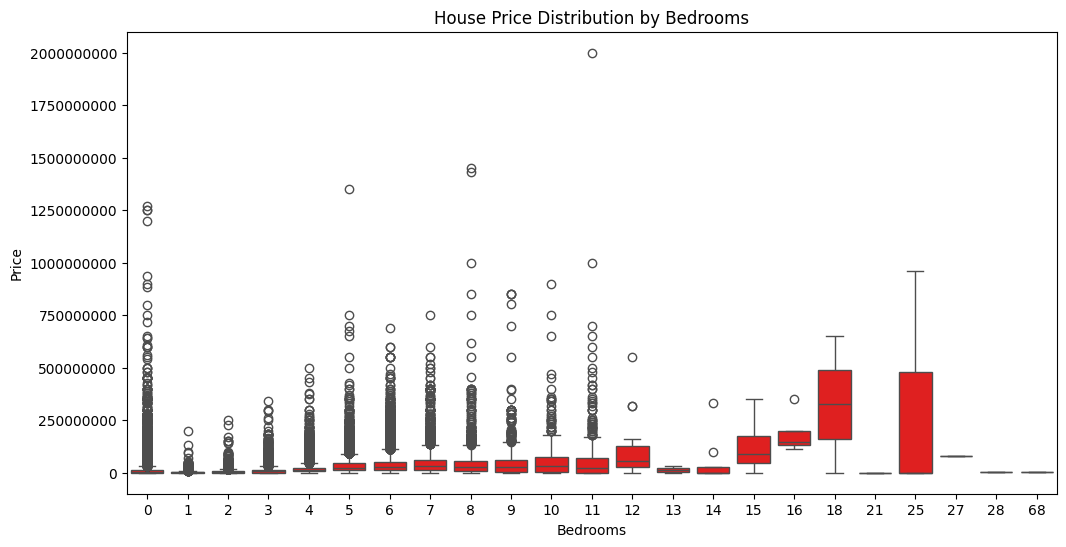

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['bedrooms'], y=df['price'], color='red')
plt.title("House Price Distribution by Bedrooms")
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()

House Price Distribution by Bedrooms


This boxplot shows that, generally, as the number of bedrooms increases, house prices also tend to increase. However, there's a wide range of prices for each bedroom count, with many extreme outliers. These outliers may indicate unusual or incorrectly entered data and might need to be cleaned or handled before modeling.

Note: A few entries with very high bedroom counts (like 68) look unrealistic and could be data entry errors.

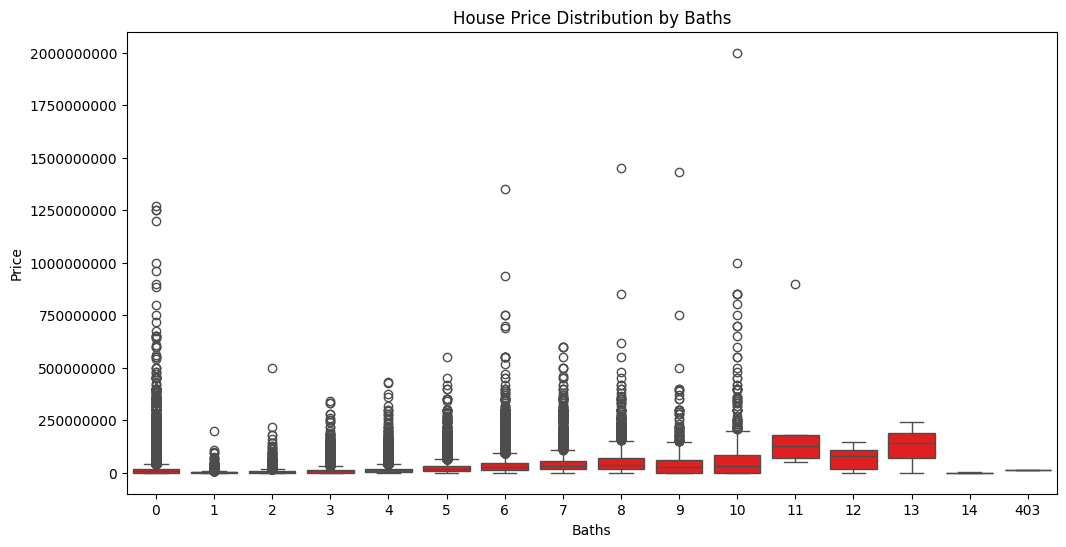

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['baths'], y=df['price'], color='red')
plt.title("House Price Distribution by Baths")
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel("Baths")
plt.ylabel("Price")
plt.show()

House Price Distribution by Baths


Similarly, the number of bathrooms is positively associated with house prices. As bathroom count increases, price also tends to increase. But again, there are many outliers at every level, and an extremely high value like 403 baths seems to be a clear anomaly that should be removed or corrected during preprocessing.

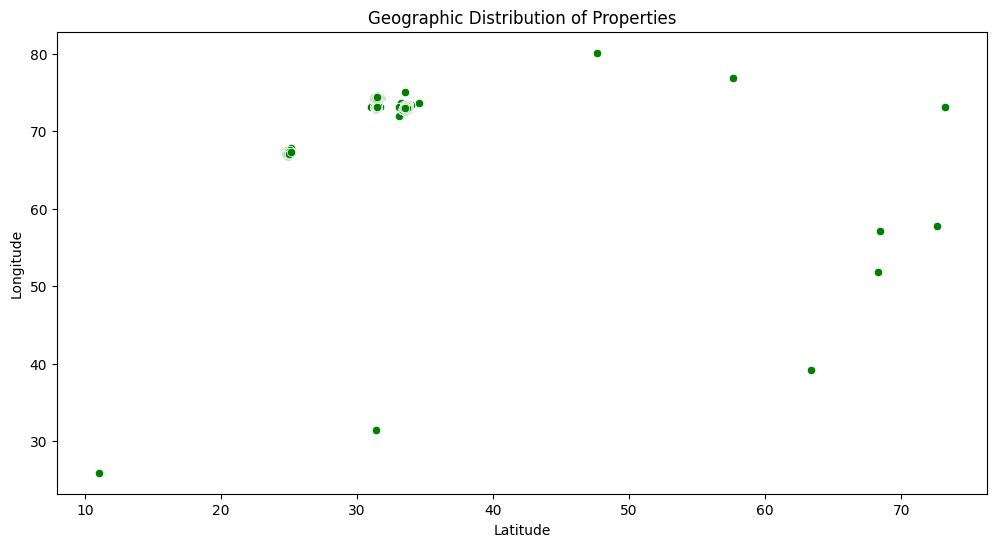

In [15]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['latitude'], y=df['longitude'], color='green')
plt.title('Geographic Distribution of Properties')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

Geographic Distribution of Properties (Latitude vs Longitude)


This scatter plot shows the geographic locations of listed properties. We observe dense clusters in valid latitude-longitude regions (likely major cities like Lahore, Karachi, Islamabad), but some points appear far off, these are likely incorrect or missing coordinate values and may need to be removed or corrected during data cleaning.

For Categorical Columns

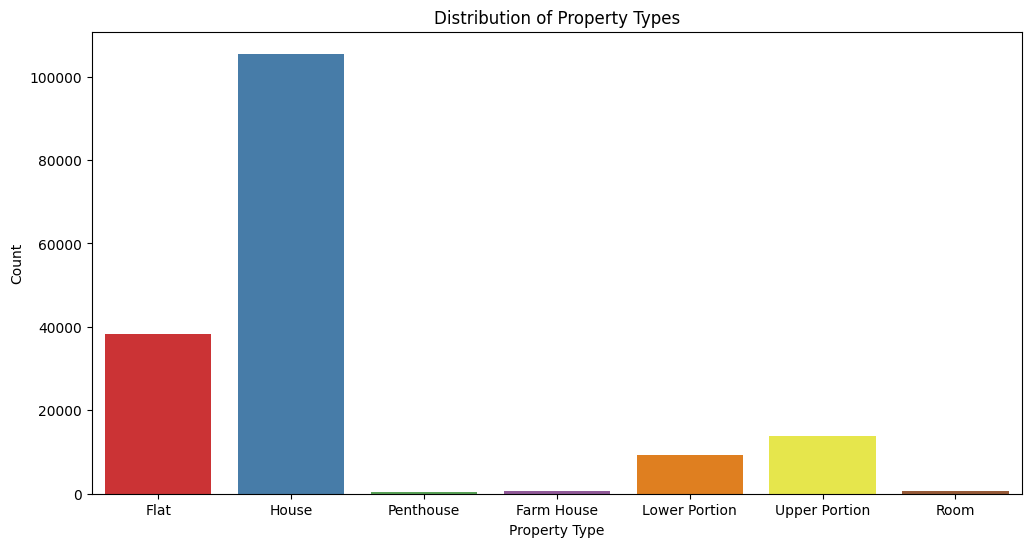

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df['property_type'], palette='Set1')
plt.title('Distribution of Property Types')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.show()

Distribution of Property Types


This bar chart shows that most of the listings are for Houses, followed by Flats. Other types like Penthouse, Farm House, and Rooms are very rare. 

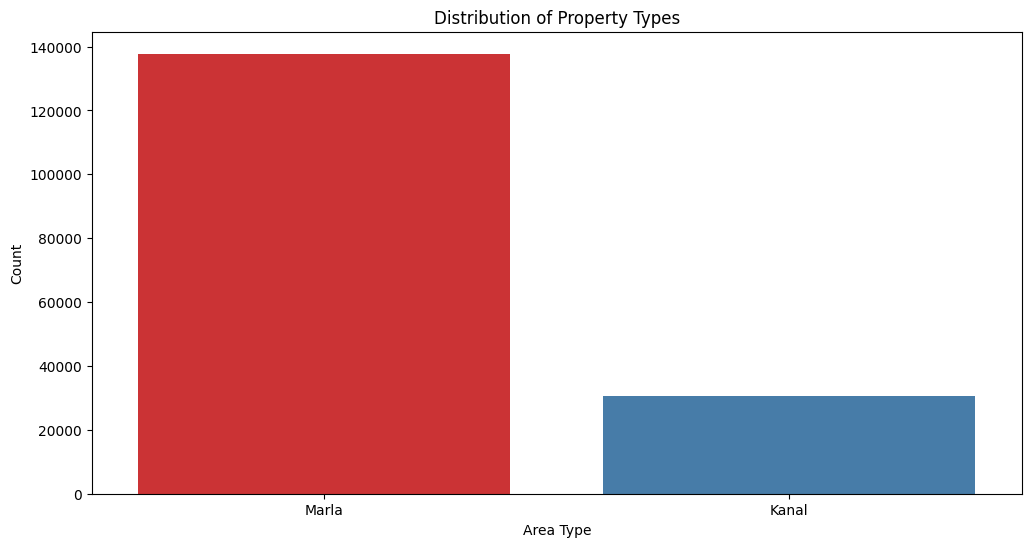

In [15]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df['Area Type'], palette='Set1')
plt.title('Distribution of Property Types')
plt.xlabel('Area Type')
plt.ylabel('Count')
plt.show()

Distribution of Area Types (Marla vs Kanal)

This bar chart shows that most properties are measured in Marla, with a smaller portion in Kanal.

# Heatmap for the Numeric Columns

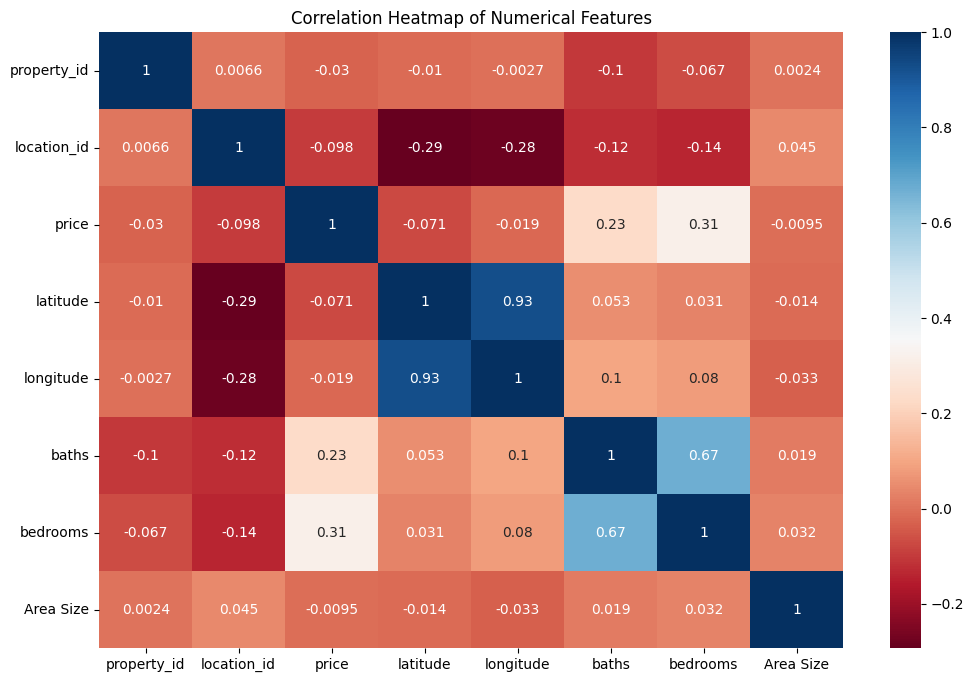

In [8]:
# Selecting only numeric columns 
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

# Correlation Matrix 
corr_matrix = numeric_cols.corr() 

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

### Correlation Heatmap Analysis

The heatmap above shows the Pearson correlation coefficients between numerical features in the dataset. Here's what we can observe:

- `latitude` and `longitude` are **highly correlated** (`0.93`), which makes sense geographically.
- `bedrooms` and `baths` also show a **strong positive correlation** (`0.67`), as properties with more bedrooms typically have more bathrooms.
- `price` shows weak to moderate correlation with:
  - `bedrooms` (`0.31`)
  - `baths` (`0.23`)
  - Other features have very low or no significant correlation with `price`.


# Removing the Outliers

In [9]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    
    IQR = Q3 - Q1
    
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    df = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]

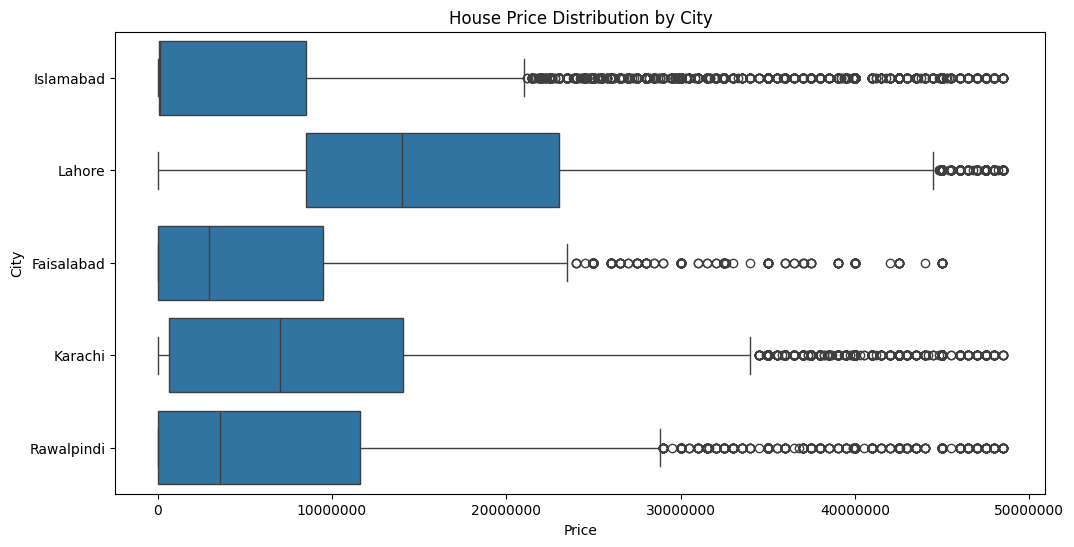

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='price', y='city', data=df)
plt.title("House Price Distribution by City")
plt.ticklabel_format(style='plain', axis='x') 
plt.xlabel("Price")
plt.ylabel("City")
plt.show()

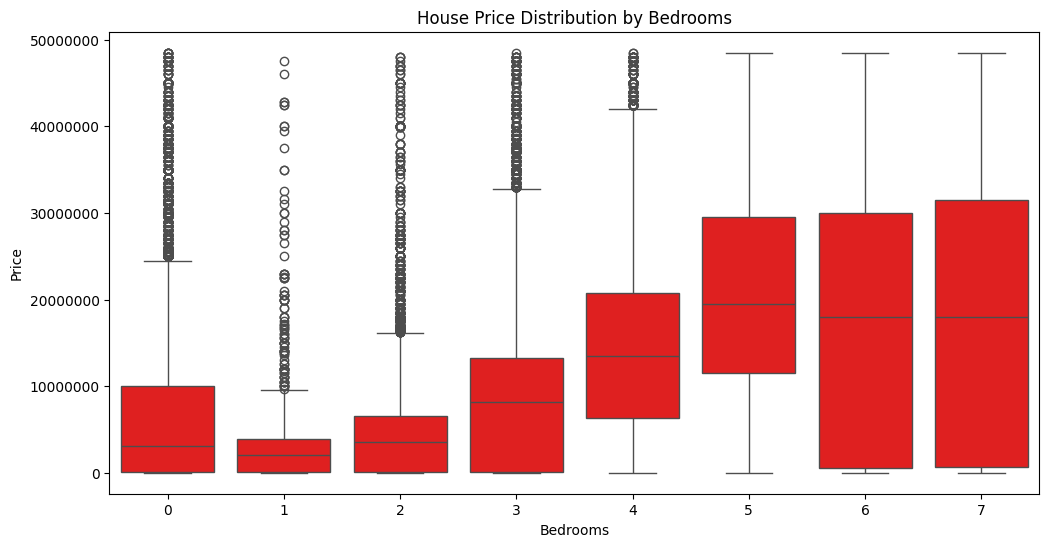

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['bedrooms'], y=df['price'], color='red')
plt.title("House Price Distribution by Bedrooms")
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()

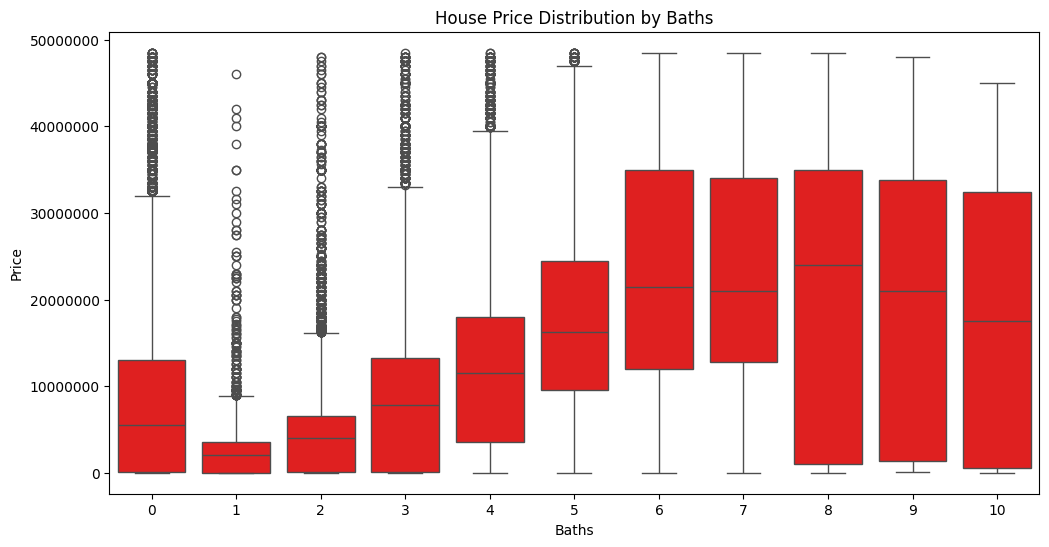

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['baths'], y=df['price'], color='red')
plt.title("House Price Distribution by Baths")
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel("Baths")
plt.ylabel("Price")
plt.show()

After removing the outliers, the updated boxplots show a more balanced distribution. The long whiskers have been significantly reduced, allowing for clearer comparison. This cleaned data is now better suited for accurate modeling and analysis.

In [18]:
df.shape

(139091, 20)

# Feature Engg

In [10]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['house_age'] = 2025 - df['date_added'].dt.year

df['bed_bath'] = df['bedrooms'] / (df['baths'] + 1)
# here +1 is to avoid division by zero error

def convert_to_sqft(row):
    area_type = str(row['Area Type']).strip().lower()

    if area_type == 'kanal':
        return row['Area Size'] * 4500
    elif area_type == 'marla':
        return row['Area Size'] * 225
    else:
        return None

    
df['area_sqft'] = df.apply(convert_to_sqft, axis=1)
df['area_sqft'] = pd.to_numeric(df['area_sqft'], errors='coerce')

### Feature Engineering Steps

To enhance model performance, several new features were created:
- **`house_age`**: Calculated as the difference between the year 2025 and the year the house was added to estimate property age.
- **`bed_bath`**: A ratio of bedrooms to (bathrooms + 1) to avoid division by zero.
- **`area_sqft`**: Standardized all area measurements into square feet using domain knowledge: 1 Kanal = 4500 sqft, 1 Marla = 225 sqft.


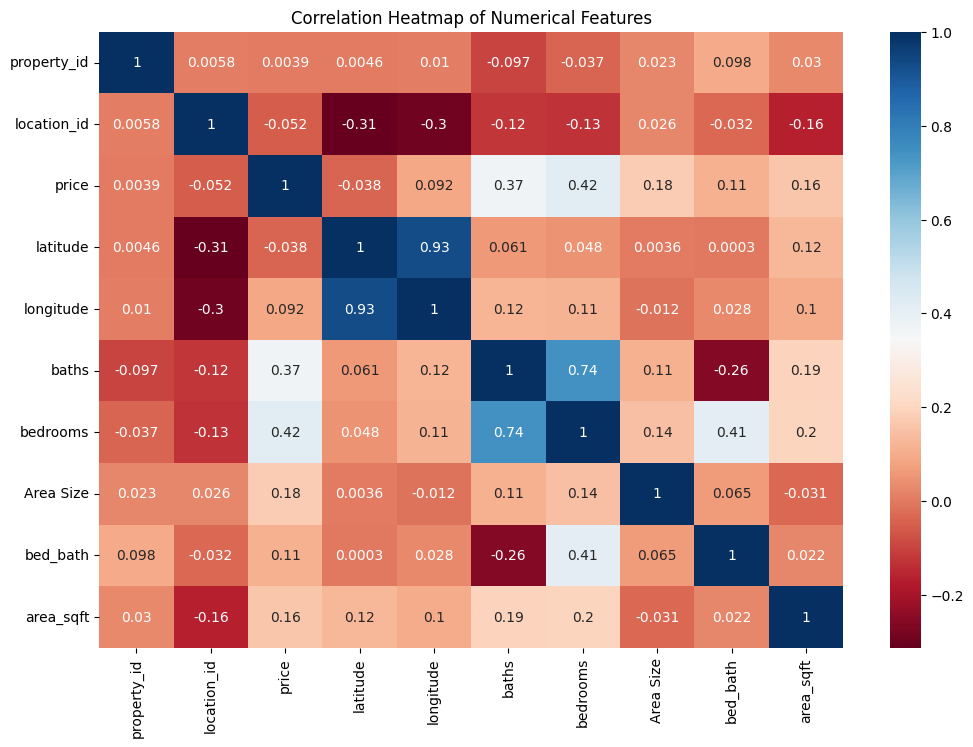

In [11]:
# Selecting only numeric columns 
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

# Correlation Matrix 
corr_matrix = numeric_cols.corr() 

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Feature Elimination

In [12]:
columns_to_drop = ['property_id', 'location_id', 'page_url', 'date_added', 'agency', 'agent']
df.drop(columns=columns_to_drop, inplace=True)

### Dropping Irrelevant or Redundant Columns

The following columns were dropped as they do not contribute to the predictive modeling process: `property_id`, `location_id`, `page_url`, `date_added`, `agency`, and `agent`. These columns are either identifiers, URLs, or textual data not useful for numerical modeling.


In [10]:
# displaying the columns 
print(df.columns)

Index(['property_type', 'price', 'location', 'city', 'province_name',
       'latitude', 'longitude', 'baths', 'area', 'purpose', 'bedrooms',
       'Area Type', 'Area Size', 'Area Category', 'house_age', 'bed_bath',
       'area_sqft'],
      dtype='object')


# Encoding Categorical Features

In [13]:
# One-hot encoding 
cols_to_encode = ['property_type', 'location', 'city', 'province_name', 'area', 'purpose', 'Area Type', 'Area Category']
df_encoded = pd.get_dummies(df, columns=cols_to_encode, drop_first=True)

### One-Hot Encoding Categorical Features
To prepare the data for machine learning models, I performed one-hot encoding on categorical columns such as `property_type`, `location`, `city`, and others. This process converts each category into binary columns, allowing models to interpret them numerically.


# Train Test Split and Standardization

In [14]:
x = df_encoded.drop('price', axis=1)
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# 20% data for the testing and 80% for the training

# Standard Scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [15]:
lr = LinearRegression()
lr_model = lr.fit(x_train_scaled, y_train)
y_pred_lr = lr_model.predict(x_test_scaled)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

rmse_lr = np.sqrt(mse_lr)

# print(f"Mean Squared Error: {mse_lr:.2f}")
print(f"R² Score: {r2_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")

R² Score: 0.73
RMSE: 5857642.55


In [16]:
rf = RandomForestRegressor(max_depth=10, random_state=42)
rf_model = rf.fit(x_train_scaled, y_train)
y_pred_rf = rf_model.predict(x_test_scaled)

r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

rmse_rf = np.sqrt(mse_rf)

# print(f"Mean Squared Error: {mse_rf:.2f}")
print(f"R² Score: {r2_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")

R² Score: 0.91
RMSE: 3377882.73


Note on RMSE:
Due to the large magnitude of house prices (millions to billions), the RMSE values were extremely high.
While R² remained interpretable, the errors in absolute form were inflated by outliers.
Logarithmic transformation or scaling the target could have reduced this effect but was intentionally avoided to keep output prices interpretable

In [17]:
def predict_price(input_data, scaler, model, df_reference):
    # Convert input to DataFrame
    input_df = pd.DataFrame([input_data])

    # Generate dummy variables to match training data structure
    input_encoded = pd.get_dummies(input_df)

    # Align with training data columns
    input_encoded = input_encoded.reindex(columns=df_reference.columns.drop('price'), fill_value=0)

    # Scale input
    input_scaled = scaler.transform(input_encoded)

    predicted_price = model.predict(input_scaled)[0]
    return predicted_price


In [18]:
input_data = {
    'latitude': 31.5204,
    'longitude': 74.3587,
    'baths': 3,
    'bedrooms': 4,
    'Area Size': 5.0,
    'house_age': 10,
    'bed_bath': 7,
    'area_sqft': 2250,
    'property_type_House': 1,
    'city_Lahore': 1,
    'province_name_Punjab': 1,
    'purpose_For Sale': 1,
    'Area Type_Marla': 1,
}


In [19]:
predicted = predict_price(input_data, scaler, rf_model, df_encoded)
print(f"Predicted House Price: PKR {predicted:,.0f}")

Predicted House Price: PKR 21,132,804
